In [ ]:
import numpy as np
import pandas as pd

**1. Input a set of training examples**

**2. For each training example $x$:** $\text{Set the correspoinding input activation}$ $x^{x,1}$ $\text{, and perform the following steps:}$
-   **Feedforward:** $\text{For each}$ $l = 2,3, ..., L$ $\text{compute}$ $z^{x,l} = w^{l}a^{x,l-1} + b^{l}$ and $a^{x,l} = \sigma(z^{x,l})$

-   **Output error $\delta^{x,L}$:** $\text{Compute the vector}$ $\delta^{x,L} = \nabla_a C_x \odot \sigma'(z^{x,L})$

-   **Backpropagate the error**: $\text{For each}$ $l = L -1, L-2, ..., 2$ $\text{compute}$ $\delta^{x,l} = ((w^{l+1})^T \delta^{x,l+1}) \odot \sigma'(z^{x,l})$

**3.Gradient descent:** $\text{For each}$ $l = L, L-1, ..., 2$  $\text{update the weights according to the rule}$ 
$w^l \rightarrow
w^l-\frac{\eta}{m} \sum_x \delta^{x,l} (a^{x,l-1})^T,$
$\text{and the biases according to the rule}$ $b^l \rightarrow
b^l-\frac{\eta}{m} \sum_x \delta^{x,l}.$

In [ ]:
# TODO:
# - backpropagation
'''
Initialize the weights & biases in nn_model with random values between -0.5 and 0.5
while the number of epochs is less than the max_epochs:
    # feedforward propagation
    for each sample in the training data:
        for each node in input layer: # input layer is the first layer
            set the input value to the input node Output_j = Input_j # activation function is identity function in input layer
        for each node in hidden layers and output layer: # activation function is considered sigmoid in here for hidden layers
            Input_j = sum(Weight_ij * Output_i) + Bias_j  # where j is the node index, i is the node index of the previous layer
            Output_j = sigmoid(Input_j) # sigmoid = 1/(1+exp(-Input_j))
    
    # backpropagating the errors
    # where j is the node index, i is the node index of the previous layer
    for each node_j in output layer:
        Error_j = (Target_j - Output_j) * sigmoid(Input_j) * (1 - sigmoid(Input_j))
    for each node_j in hidden layers: # from the last hidden layer to the first hidden layer
        Error_j = sigmoid(Input_j) * (1 - sigmoid(Input_j)) * sum(Error_k * Weight_jk) # where k is the node index of the next layer - e.g.: O_j (1 - O_j) * (Error_1 * W_j1 + Error_2 * W_j2 + ... + Error_n * W_jn)
    
    # update weights and biases
    for each weight_ij in weights: # neuron_i ------weight_ij------ neuron_j
        Weight_ij = Weight_ij + learning_rate * Error_j * Output_i # where j is the node index, i is the node index of the previous layer
    for each bias_j in biases:
        Bias_j = Bias_j + learning_rate * Error_j # where j is the node index
'''
# - chain rule
'''
reminder: y=f(x) and x=g(t) then what is ∂y/∂t=?
        answer: ∂y/∂t = ∂f(x)/∂x * ∂x/∂t
        e.g.: y = f(x) = x^2 and x = g(t) = t^3 then what is ∂y/∂t?
        answer: ∂y/∂t = 2x * 3t^2

Error = 1/2 * (Target - Output)^2
# 
# ∇E is derivative of the cost function with respect to the weight (∂E/∂Weight)
# Where E is a function of the output_j and output_j is a function of the input_j and input_j is a function of the weight_ij
# So we can use chain rule to calculate ∇E like:
# ∂E/∂W_ij = ∂E/∂output_j * ∂output_j/∂input_j * ∂input_j/∂weight_ij
#  
Weight <- Weight - ( learning_rate * ∇E )
Bias <- Bias - ( learning_rate * ∇E/∂Bias )

'''


In [ ]:
# TODO:
#
# load data
# data preprocessing
# ----------------------------------------------------------------
# Create a class for the neural network
# 1. Input layer 2. Hidden layer 3. Output layer
# ----------------------------------------------------------------
# Feedforward Nueral Network:
# ReLU|Sigmoid(np.dot(weight, activation) + bias)
# ----------------------------------------------------------------
# Stoachastic Gradient Descent (SGD):
# Train the neural network using mini-batch stochastic gradient descent
# ----------------------------------------------------------------
# Update Mini Batch:
# for each mini-batch, update the weights and biases using the gradient
#   nabla_b = nabla_b + delta_nabla_b
#   nabla_w = nabla_w + delta_nabla_w
# weight = weight - (eta/len(mini_batch_size)) * nabla_w
# bias = bias - (eta/len(mini_batch_size)) * nabla_b
# ----------------------------------------------------------------
# Backpropagation:
# for each bias and weight
#   z_vector = np.dot(weight, activation) + bias
#   appply activation function sigmoid, ReLU, tanh, etc.
# delta = ∇cost(z_vector, y) * ∇activation(z_vector) 
# nabla_b = delta
# nabla_w = < delta, activation>
# for each layer (input, hidden, output)
#   update ∇bias and ∇weight
# return ∇b, ∇w
# ----------------------------------------------------------------
# Define different activation functions
# Sigmoid, ReLU, Softmax, tanh. 
# sigmoid(z) = 1 / (1 + exp(-z))
# ReLU(z) = max(0, z)
# Softmax(z) = exp(z) / sum(exp(z))
# tanh(z) = (exp(z) - exp(-z)) / (exp(z) + exp(-z))
# ----------------------------------------------------------------
# define different layer classes
# Fully connected layer (intermediate layer), Convolutional_Pooling_layer (), Softmax layer (output layer) 
# ----------------------------------------------------------------
# Integrate numba {+ CuPy:{NumPy & SciPy for GPU}} for faster computation
'''
import cupy as cp
import numpy as np
from numba import cuda
cuda.detect()

array = np.random.randint(0,255, size=(4000,4000))
# array_gpu = cp.asarray(array)

# call timeit inline function
# %timeit cp.asarray(array)
%timeit np.asarray(array)
'''

iteration 0, loss 0.769668
iteration 1000, loss 0.052906
iteration 2000, loss 0.047573
iteration 3000, loss 0.045362
iteration 4000, loss 0.043135
iteration 5000, loss 0.040935
iteration 6000, loss 0.039158
iteration 7000, loss 0.037517
iteration 8000, loss 0.036032
iteration 9000, loss 0.034709
iteration 10000, loss 0.033538
iteration 11000, loss 0.032506
iteration 12000, loss 0.031596
[0 0 1]


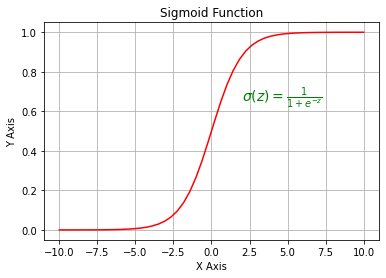

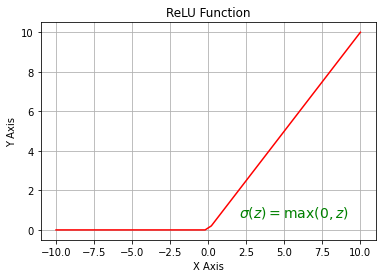

In [53]:
# hands-on
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def ReLU(z):
    return np.maximum(0, z)

def build_model(X, hidden_nodes, output_dimension=2):
    model = {}
    input_dimension = X.shape[1]
    model['W1'] = np.random.randn(input_dimension, hidden_nodes) / np.sqrt(input_dimension)
    model['b1'] = np.zeros((1, hidden_nodes))
    model['W2'] = np.random.randn(hidden_nodes, output_dimension) / np.sqrt(hidden_nodes)
    model['b2'] = np.zeros((1, output_dimension))
    return model

def feedforward(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = X.dot(W1) + b1
    a1 = ReLU(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return z1, a1, z2, probs

def calculate_loss(model, X, y, regularization_lambda):
    num_sample = X.shape[0]
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    z1, a1, z2, probs = feedforward(model, X)
    
    # average cross-entropy loss
    corect_logprobs = -np.log(probs[range(num_sample), y])
    data_loss = np.sum(corect_logprobs) / num_sample
    
    # add regularization term
    reg_loss = 0.5 * regularization_lambda * (np.sum(W1 * W1) + np.sum(W2 * W2))
    return data_loss + reg_loss

def relu_derivative(z):
    return (z > 0).astype(int)

def backprop(X, y, model, z1, a1, z2, output, regularization_lambda):
    delta3 = output
    delta3[range(len(y)), y] -= 1
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)

    delta2 = delta3.dot(model['W2'].T) * relu_derivative(z1)
    dW1 = np.dot(X.T, delta2)
    db1 = np.sum(delta2, axis=0)

    # add regularization term
    dW2 += regularization_lambda * model['W2']
    dW1 += regularization_lambda * model['W1']

    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return grads

def train(model, X, y, num_passes=10000, learning_rate=0.001, regularization_lambda=0.01):
    done = False
    previous_loss = float('inf')
    i = 0
    losses = []
    while done  == False:
        z1, a1, z2, probs = feedforward(model, X)
        grads = backprop(X, y, model, z1, a1, z2, probs, regularization_lambda)
        model['W1'] -= learning_rate * grads['dW1']
        model['b1'] -= learning_rate * grads['db1']
        model['W2'] -= learning_rate * grads['dW2']
        model['b2'] -= learning_rate * grads['db2']
        
        if i % 1000 == 0:
            loss = calculate_loss(model, X, y, regularization_lambda)
            losses.append(loss)        
            print('iteration %d, loss %f' % (i, loss))
            if previous_loss - loss < 0.001:
                done = True
        previous_loss = loss
        i += 1
    return model, losses


x_train = np.array([[1, 1], [3, 3], [6, 6], [9, 9]])
y_train = np.array([0, 0, 1, 1])

x_test = np.array([[2, 2], [0, 0], [11, 11]])
y_test = np.array([0, 0, 1])

model = build_model(x_train, 3, 2)
model, losses = train(model, x_train, y_train, learning_rate=0.01, regularization_lambda=0.01)
output = feedforward(model, x_test)
preds = np.argmax(output[2], axis=1)
print(preds)

x = np.linspace(-10, 10, 50)
# print(x)

plt.plot(x, sigmoid(x), 'r')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.grid(True)
plt.title('Sigmoid Function')
plt.text(2, 0.65, r'$\sigma(z)=\frac{1}{1+e^{-z}}$', fontsize=14, color='Green')
plt.show()

x = np.linspace(-10, 10, 50)
plt.plot(x, ReLU(x), 'r')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(2, 0.65, r'$\sigma(z)=\max(0,z)$', fontsize=14, color='Green')
plt.show()

In [40]:
from sklearn.neural_network import MLPClassifier

x_train = np.array([[1, 1], [3, 3], [6, 6], [9, 9]])
y_train = np.array([0, 0, 1, 1])

x_test = np.array([[2, 2], [0, 0], [11, 11]])
y_test = np.array([0, 0, 1])

# model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# model = MLPClassifier(hidden_layer_sizes=(7), max_iter=110, alpha=1e-4, solver='sgd', random_state=1, verbose=True, tol=1e-4, learning_rate_init=.1)
model = MLPClassifier(hidden_layer_sizes=(2), max_iter=20, alpha=1e-4, solver='adam', verbose=True, learning_rate_init=.1)
model.fit(x_train, y_train)
model.score(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print("y_predicted: ", y_pred, "accuracy: ", accuracy)

Iteration 1, loss = 0.63157396
Iteration 2, loss = 0.64513909
Iteration 3, loss = 0.64420943
Iteration 4, loss = 0.50179940
Iteration 5, loss = 0.37328910
Iteration 6, loss = 0.41614449
Iteration 7, loss = 0.41872010
Iteration 8, loss = 0.31776046
Iteration 9, loss = 0.28257410
Iteration 10, loss = 0.28866880
Iteration 11, loss = 0.29060992
Iteration 12, loss = 0.27457642
Iteration 13, loss = 0.24481938
Iteration 14, loss = 0.21327516
Iteration 15, loss = 0.19262351
Iteration 16, loss = 0.18834719
Iteration 17, loss = 0.19141201
Iteration 18, loss = 0.18575174
Iteration 19, loss = 0.16874659
Iteration 20, loss = 0.15118069
y_predicted:  [0 0 1] accuracy:  1.0


C:\ProgramData\Anaconda3\envs\RT-Academy\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [55]:
temp_X, temp_y = X, y

In [63]:
X = X / 255.

print(X.shape)
print(y.shape)

X_train = X[:60000]
X_test = X[60000:]

y_train = y[:60000]
y_test = y[60000:]

model = MLPClassifier(max_iter=100, solver='sgd', verbose=10, learning_rate_init=.1, tol=1e-4, random_state=1, alpha=1e-4)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("accuracy: ", accuracy)


(70000, 784)
(70000,)
Iteration 1, loss = 2.30303901
Iteration 2, loss = 2.30256791
Iteration 3, loss = 2.30239563
Iteration 4, loss = 2.30229811
Iteration 5, loss = 2.30227646
Iteration 6, loss = 2.30228811
Iteration 7, loss = 2.30225713
Iteration 8, loss = 2.30240971
Iteration 9, loss = 2.30223240
Iteration 10, loss = 2.30233390
Iteration 11, loss = 2.30232919
Iteration 12, loss = 2.30241972
Iteration 13, loss = 2.30233115
Iteration 14, loss = 2.30226290
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
accuracy:  0.1135


In [23]:
import tokenizer

text = "This is a document. It has many sentences."
# tokenize the text
tokens = list(tokenizer.tokenize(text))
tokens

# do same with tokenizer module
import tokenizers as tk


model.fit_on_texts(text)
tokens = list(model.texts_to_sequences([text]))
tokens


# install the "tokenizer" and install dependencies
conda skeleton pypi --setup-options tokenizer

TypeError: PyTokenizer.__new__() missing required positional argument: model